<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
df

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [6]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [7]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [8]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [9]:
# Mean of all salaries

print(f"The mean of all salaries totals:\n ${df['salary'].mean().astype(int)}")


The mean of all salaries totals:
 $113706


In [10]:
# Median of all salaries

print(f"The median of all salaries totals:\n ${df['salary'].median().astype(int)}")


The median of all salaries totals:
 $107300


# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [11]:

dfgendersalary = df[['sex','salary']]

dfgendersalary


,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Finding the Median salary for all males

In [12]:

malesalary_df = df[(df.sex ==("Male"))]

print(f"The median of all males' salaries totals:\n ${malesalary_df['salary'].median().astype(int)}")


The median of all males' salaries totals:
 $108043


In [13]:
df.groupby(['sex'])['salary'].median()

sex
Female    103750.0
Male      108043.0
Name: salary, dtype: float64

Finding the Median salary for all females

In [14]:

femalesalary_df = df[(df.sex ==("Female"))]

print(f"The median of all females' salaries totals:\n ${femalesalary_df['salary'].median().astype(int)}")


The median of all females' salaries totals:
 $103750


In [15]:
df.groupby(['sex'])['salary'].median()

sex
Female    103750.0
Male      108043.0
Name: salary, dtype: float64

Comparing the Mean salary of Males and Females

In [16]:

malesalary_df["salary"].mean().astype(int)

print(f"The mean of all males' salaries totals:\n ${malesalary_df['salary'].mean().astype(int)}")


The mean of all males' salaries totals:
 $115090


In [17]:

femalesalary_df["salary"].mean().astype(int)

print(f"The mean of all females' salaries totals:\n ${femalesalary_df['salary'].mean().astype(int)}")


The mean of all females' salaries totals:
 $101002


In [18]:
# The difference between mean salaries of male and female

spreadofmeangendersalaries = malesalary_df['salary'].mean()-femalesalary_df['salary'].mean()

print(f"The difference between mean salaries of men and women totals:\n ${spreadofmeangendersalaries.astype(int)}")


The difference between mean salaries of men and women totals:
 $14088


<AxesSubplot:xlabel='sex'>

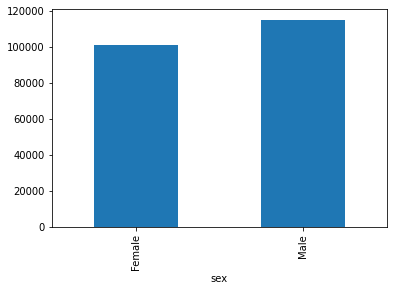

In [19]:
df.groupby(['sex'])['salary'].mean().plot(kind='bar')

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [20]:
df.rename(columns={'yrs.service':'yrsservice'}, inplace = True)
yearsexp20_df = df[(df.yrsservice == 20)]

print(f"The mean salary of those with 20 years of eperience totals:\n ${yearsexp20_df['salary'].mean().astype(int)}")



The mean salary of those with 20 years of eperience totals:
 $128647


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [21]:
yearsexpgreater20 = df[(df.yrsservice > 20)]
yearsexpless20 = df[(df.yrsservice < 20)]
yearsexpgreater20['salary'].mean().astype(int)

print(f"The mean salary of those with more than 20 years of eperience totals:\n ${yearsexpgreater20['salary'].mean().astype(int)}")

print(f"The mean salary of those with less than 20 years of eperience totals:\n ${yearsexpless20['salary'].mean().astype(int)}")

The mean salary of those with more than 20 years of eperience totals:
 $122103
The mean salary of those with less than 20 years of eperience totals:
 $107940


<AxesSubplot:ylabel='Frequency'>

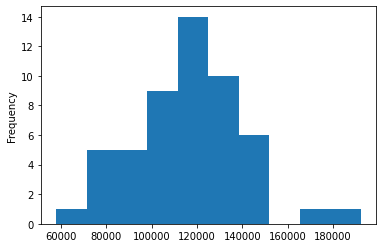

In [22]:
df.groupby(['yrsservice'])['salary'].mean().plot(kind='hist')

<AxesSubplot:xlabel='yrsservice', ylabel='salary'>

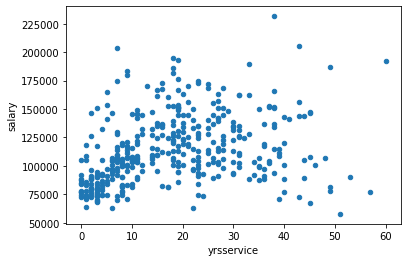

In [23]:
df.plot.scatter(x='yrsservice',y='salary')

People who have salary of greater than or equal to 200,000

In [24]:
salarymoreequal200k = df[(df.salary >= 200000)]
salarymoreequal200k


,Unnamed: 0,rank,discipline,yrs.since.phd,yrsservice,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here...


# Rename values, subset columns, etc

In [25]:
df.rename(columns={'yrs.since.phd':'yrssincephd'}, inplace = True)

# Create some simple visualizations showing some simple statistics

In [26]:
df

,Unnamed: 0,rank,discipline,yrssincephd,yrsservice,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


<AxesSubplot:xlabel='discipline'>

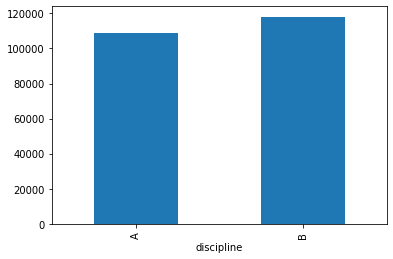

In [27]:
df.groupby(['discipline'])['salary'].mean().plot(kind="bar")

In [28]:
## reference
spreadofmeangendersalaries = malesalary_df['salary'].mean()-femalesalary_df['salary'].mean()

spreadofmeangendersalaries = malesalary_df['salary'].mean()-femalesalary_df['salary'].mean()

In [29]:
df.groupby(['discipline'])['salary'].mean()

discipline
A    108548.430939
B    118028.694444
Name: salary, dtype: float64

In [30]:

disciplinea_df = df[(df.discipline ==("A"))]
disciplineb_df = df[(df.discipline ==("B"))]

a=disciplinea_df["salary"].mean()
b=disciplineb_df['salary'].mean()


print(f'The percentage increase between the mean salaries of Discipline A and Discipline B totals:\n {(((b-a)/(a))*100)}%')



spreadofmeandisciplinesalaries = disciplineb_df['salary'].mean()-disciplinea_df['salary'].mean()

print(f"The difference between the mean salaries of Discipline A and Discipline B totals:\n ${spreadofmeandisciplinesalaries.astype(int)}")

The percentage increase between the mean salaries of Discipline A and Discipline B totals:
 8.733671618455435%
The difference between the mean salaries of Discipline A and Discipline B totals:
 $9480


Your observations from the visuals: 

In [31]:
# From the visual above, one can assume that professors in disciplne B make on average $9,840 (8.73%) more than professors in discipline A.

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here...



I also discovered that the -

 Your Findings here...



